# Projekt

In [419]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split, GridSearchCV

from sklearn.pipeline import Pipeline

from sklearn.experimental import enable_iterative_imputer
from sklearn.impute import SimpleImputer, KNNImputer, IterativeImputer
from sklearn.preprocessing import StandardScaler, RobustScaler, PowerTransformer, QuantileTransformer, OneHotEncoder
from sklearn.compose import ColumnTransformer

from sklearn.feature_selection import SelectFromModel, SequentialFeatureSelector
from sklearn.decomposition import PCA

from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier, BaggingClassifier, ExtraTreesClassifier, GradientBoostingClassifier, VotingClassifier
from sklearn.neighbors import KNeighborsClassifier

from sklearn.metrics import confusion_matrix, accuracy_score, precision_score, recall_score, ConfusionMatrixDisplay

### 1. Wczytanie danych

In [202]:
X = pd.read_csv('X_train.csv')
y = pd.read_csv('y_train.csv')

### 2. Wstępna eksploracja danych

In [203]:
X = X.drop(['Unnamed: 0'], axis = 1)

In [204]:
# -9, -8, -7 zamieniamy na braki danych
X.replace([-9, -8, -7], np.nan, inplace=True)

In [205]:
X.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3660 entries, 0 to 3659
Data columns (total 23 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   X1      3453 non-null   float64
 1   X2      3386 non-null   float64
 2   X3      3457 non-null   float64
 3   X4      3457 non-null   float64
 4   X5      3457 non-null   float64
 5   X6      3457 non-null   float64
 6   X7      3457 non-null   float64
 7   X8      3457 non-null   float64
 8   X9      1709 non-null   float64
 9   X10     3457 non-null   float64
 10  X11     3457 non-null   float64
 11  X12     3457 non-null   float64
 12  X13     3457 non-null   float64
 13  X14     3457 non-null   float64
 14  X15     2653 non-null   float64
 15  X16     3457 non-null   float64
 16  X17     3457 non-null   float64
 17  X18     3392 non-null   float64
 18  X19     2212 non-null   float64
 19  X20     3401 non-null   float64
 20  X21     3137 non-null   float64
 21  X22     3223 non-null   float64
 22  

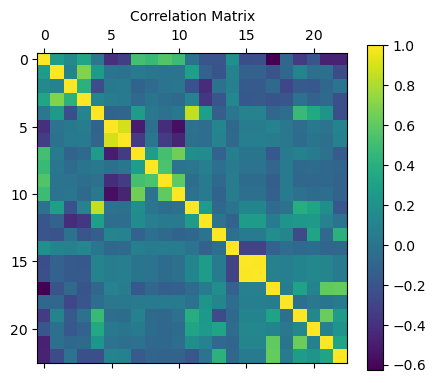

In [206]:
f = plt.figure(figsize=(5, 7))
plt.matshow(X.corr(), fignum=f.number)
cb = plt.colorbar(shrink = 0.6)
cb.ax.tick_params(labelsize=10)
plt.title('Correlation Matrix', fontsize=10);
plt.savefig("macierzkor", dpi=300, bbox_inches="tight")

In [207]:
X.iloc[:, 0:11].describe()

,X1,X2,X3,X4,X5,X6,X7,X8,X9,X10,X11
count,3453.000000,3386.000000,3457.000000,3457.000000,3457.000000,3457.000000,3457.000000,3457.000000,1709.000000,3457.000000,3457.000000
mean,72.245584,198.727112,9.958056,78.558866,20.929997,0.577090,0.382123,92.538039,22.209479,5.820654,6.440266
std,9.962179,97.279900,14.514111,34.146718,11.246386,1.276309,1.051649,11.665392,20.641342,1.603382,1.822086
min,33.000000,4.000000,0.000000,4.000000,1.000000,0.000000,0.000000,20.000000,0.000000,0.000000,2.000000
25%,65.000000,133.000000,3.000000,57.000000,13.000000,0.000000,0.000000,90.000000,5.000000,6.000000,6.000000
50%,72.000000,184.000000,6.000000,76.000000,20.000000,0.000000,0.000000,98.000000,15.000000,6.000000,6.000000
75%,80.000000,255.000000,12.000000,97.000000,28.000000,1.000000,0.000000,100.000000,34.000000,7.000000,8.000000
max,94.000000,789.000000,383.000000,383.000000,74.000000,19.000000,19.000000,100.000000,81.000000,9.000000,8.000000


In [208]:
X.iloc[:, 12:23].describe()

,X13,X14,X15,X16,X17,X18,X19,X20,X21,X22,X23
count,3457.000000,3457.000000,2653.000000,3457.000000,3457.000000,3392.000000,2212.000000,3401.000000,3137.000000,3223.000000,3447.000000
mean,1.818629,34.718831,2.437618,1.485392,1.426092,34.548349,67.778029,4.038812,2.436085,1.075706,66.224543
std,1.789993,17.895455,4.740272,2.007041,1.959616,28.801173,24.280641,3.010808,1.560170,1.496896,22.036680
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000
25%,0.000000,22.000000,0.000000,0.000000,0.000000,9.000000,53.000000,2.000000,1.000000,0.000000,50.000000
50%,1.000000,33.000000,0.000000,1.000000,1.000000,29.000000,73.000000,3.000000,2.000000,1.000000,67.000000
75%,3.000000,45.000000,3.000000,2.000000,2.000000,55.000000,87.000000,5.000000,3.000000,2.000000,83.000000
max,14.000000,100.000000,24.000000,24.000000,24.000000,232.000000,190.000000,32.000000,23.000000,13.000000,100.000000


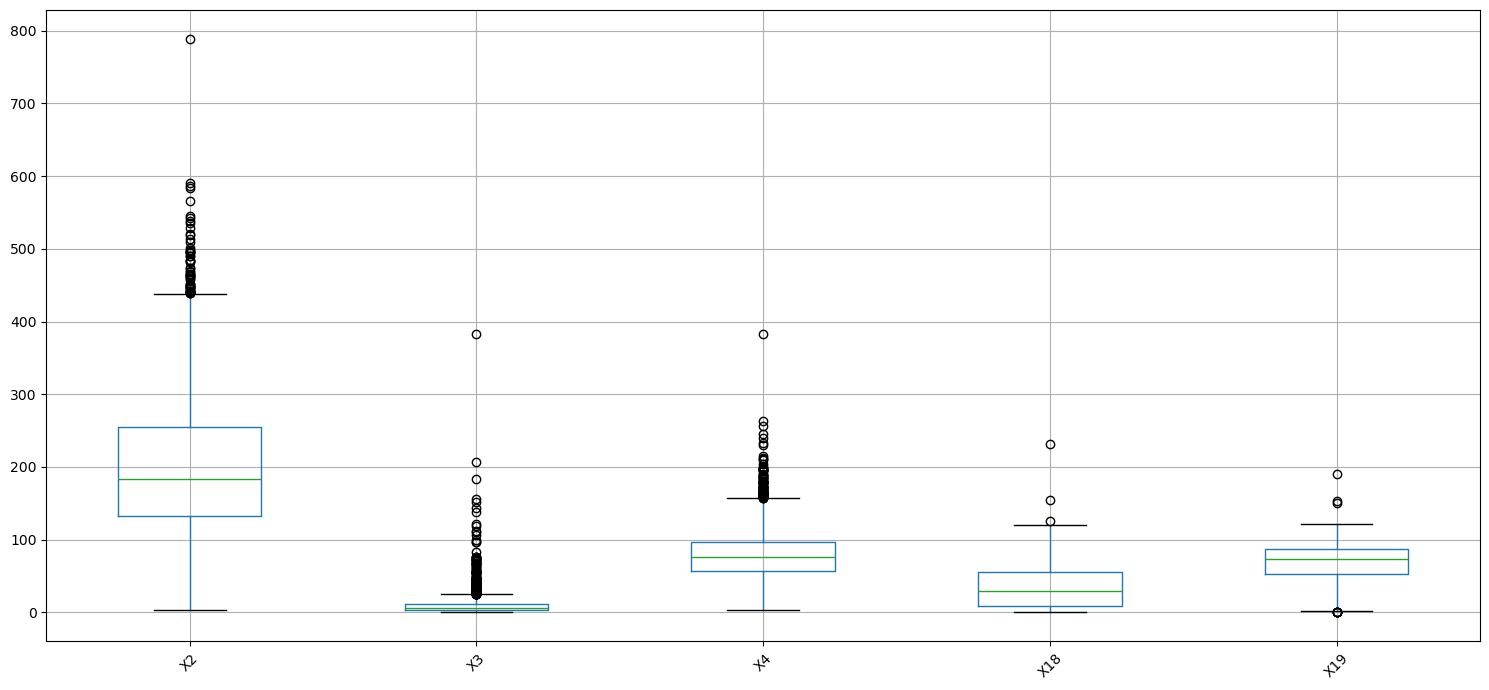

In [212]:
plt.figure(figsize=(15, 7))
X.iloc[:, [1, 2, 3, 17, 18]].boxplot(rot=45, grid=True)
plt.tight_layout()
plt.savefig("outliers1", dpi=300, bbox_inches="tight")
plt.show()

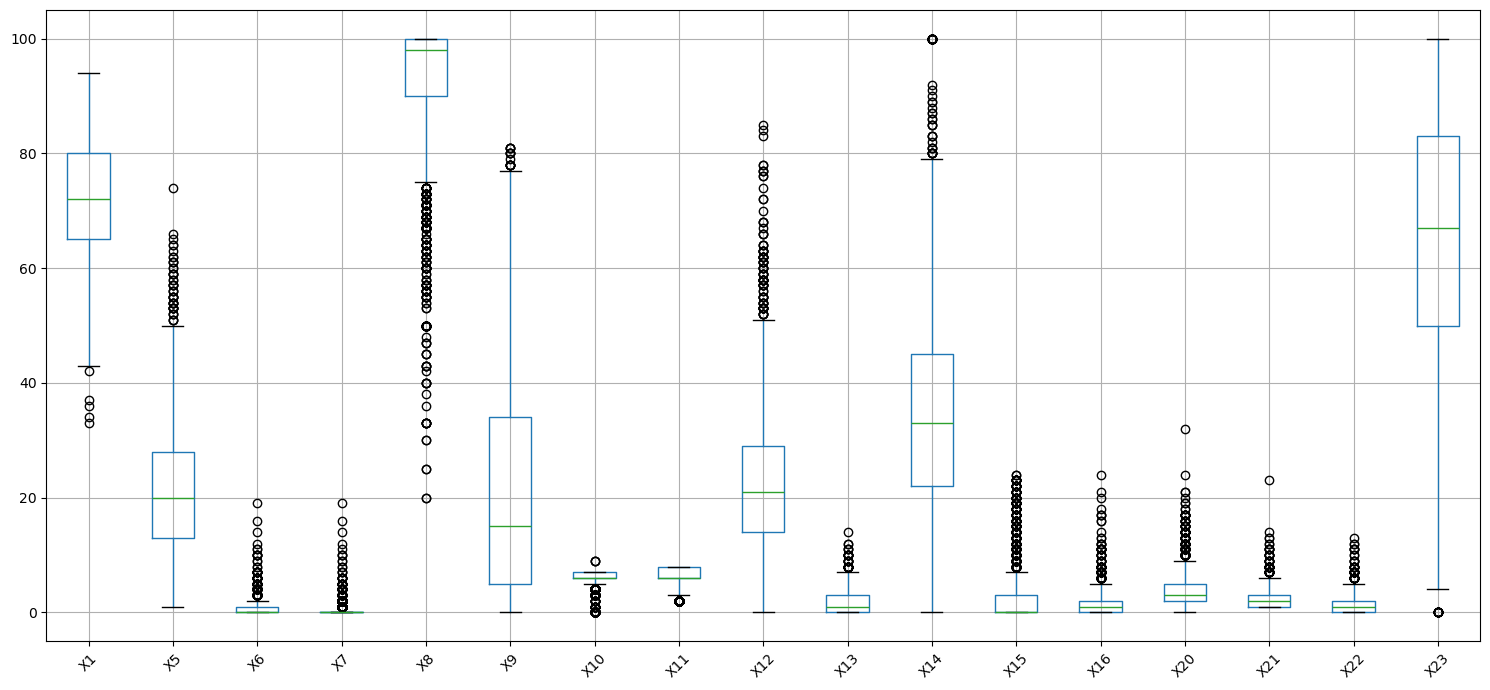

In [211]:
plt.figure(figsize=(15, 7))
columns_to_include = [0] + list(range(4, 16)) + list(range(19, 23))
X.iloc[:, columns_to_include].boxplot(rot=45, grid=True)
plt.tight_layout()
plt.savefig("outliers2", dpi=300, bbox_inches="tight")
plt.show()

array([[<Axes: title={'center': 'X1'}>, <Axes: title={'center': 'X2'}>,
        <Axes: title={'center': 'X3'}>],
       [<Axes: title={'center': 'X4'}>, <Axes: title={'center': 'X5'}>,
        <Axes: title={'center': 'X6'}>],
       [<Axes: title={'center': 'X7'}>, <Axes: title={'center': 'X8'}>,
        <Axes: title={'center': 'X9'}>],
       [<Axes: title={'center': 'X10'}>, <Axes: title={'center': 'X11'}>,
        <Axes: >]], dtype=object)

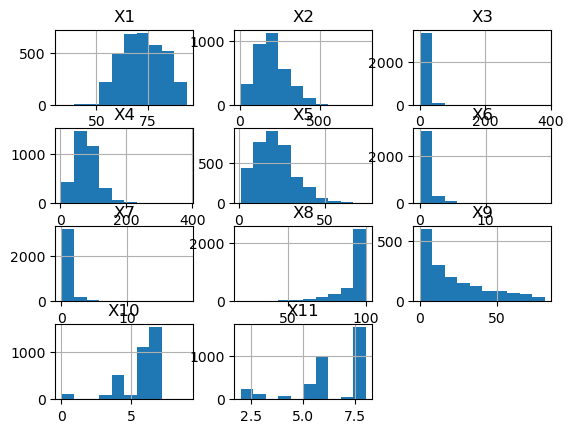

In [214]:
X.iloc[:, 0:11].hist()

array([[<Axes: title={'center': 'X13'}>, <Axes: title={'center': 'X14'}>,
        <Axes: title={'center': 'X15'}>],
       [<Axes: title={'center': 'X16'}>, <Axes: title={'center': 'X17'}>,
        <Axes: title={'center': 'X18'}>],
       [<Axes: title={'center': 'X19'}>, <Axes: title={'center': 'X20'}>,
        <Axes: title={'center': 'X21'}>],
       [<Axes: title={'center': 'X22'}>, <Axes: title={'center': 'X23'}>,
        <Axes: >]], dtype=object)

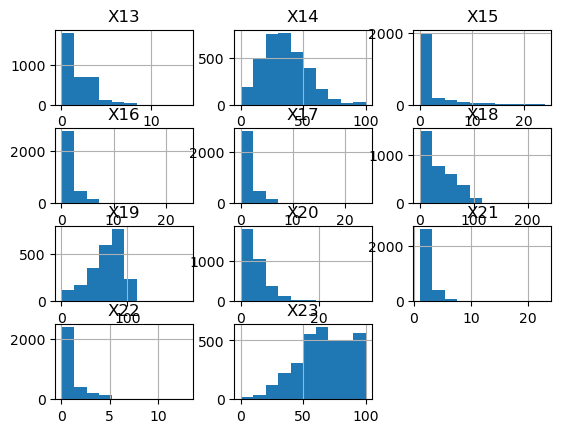

In [215]:
X.iloc[:, 12:23].hist()

In [216]:
X[['X10', 'X11']] = X[['X10', 'X11']].astype('category')

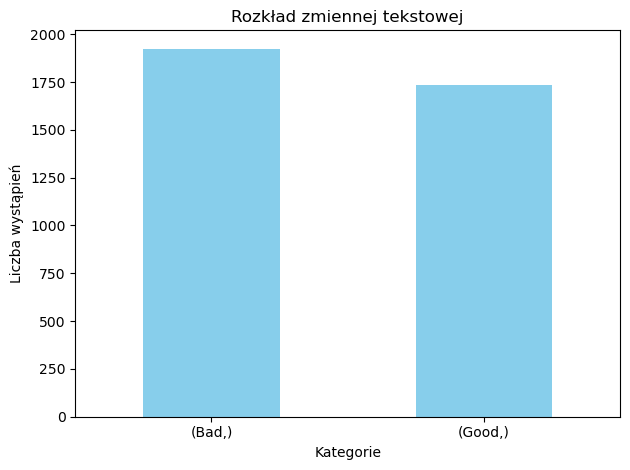

In [217]:
# analiza zmiennej celu:
y = pd.read_csv('y_train.csv')
y = y.drop(['Unnamed: 0'], axis = 1)

category_counts = y.value_counts()

# Tworzenie wykresu słupkowego
category_counts.plot(kind='bar', color='skyblue')

# Dostosowanie wykresu
plt.title('Rozkład zmiennej tekstowej')
plt.xlabel('Kategorie')
plt.ylabel('Liczba wystąpień')
plt.xticks(rotation=0)  # Obrót etykiet na osi X
plt.tight_layout()

# Wyświetlenie wykresu
plt.show()

In [218]:
y = pd.get_dummies(y)
y.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3660 entries, 0 to 3659
Data columns (total 2 columns):
 #   Column                Non-Null Count  Dtype
---  ------                --------------  -----
 0   RiskPerformance_Bad   3660 non-null   bool 
 1   RiskPerformance_Good  3660 non-null   bool 
dtypes: bool(2)
memory usage: 7.3 KB


In [219]:
y = y['RiskPerformance_Bad']

In [222]:
np.sum(y)/3660

0.5256830601092897

### 3. Przygotowanie zbiorów treningowych i testowych

In [142]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 327461)

### 4. Preprocessing danych

In [143]:
numerical_features =  list(X.dtypes[(X.dtypes != 'object') & (X.dtypes != 'category')].index)
categorical_features =  list(X.dtypes[(X.dtypes == 'object') | (X.dtypes == 'category')].index)

In [144]:
numerical_transformers = []

numerical_transformer1 = Pipeline([
    ('imputer', SimpleImputer()),
    ('scaler', StandardScaler())
])
numerical_transformers.append(numerical_transformer1)


numerical_transformer3 = Pipeline([
    ('imputer', KNNImputer()),
    ('scaler', StandardScaler())
])
numerical_transformers.append(numerical_transformer3)

numerical_transformer4 = Pipeline([
    ('imputer', SimpleImputer()),
    ('scaler', RobustScaler())
])
numerical_transformers.append(numerical_transformer4)

numerical_transformer6 = Pipeline([
    ('imputer', KNNImputer()),
    ('scaler', RobustScaler())
])
numerical_transformers.append(numerical_transformer6)

numerical_transformer7 = Pipeline([
    ('imputer', SimpleImputer()),
    ('scaler', PowerTransformer())
])
numerical_transformers.append(numerical_transformer7)

numerical_transformer9 = Pipeline([
    ('imputer', KNNImputer()),
    ('scaler', PowerTransformer())
])
numerical_transformers.append(numerical_transformer9)

numerical_transformer10 = Pipeline([
    ('imputer', SimpleImputer()),
    ('scaler', QuantileTransformer())
])
numerical_transformers.append(numerical_transformer10)

numerical_transformer12 = Pipeline([
    ('imputer', KNNImputer()),
    ('scaler', QuantileTransformer())
])
numerical_transformers.append(numerical_transformer12)

In [41]:
categorical_transformer = Pipeline([
    ('imputer', SimpleImputer(strategy = 'most_frequent')),
    ('onehot', OneHotEncoder(handle_unknown = 'ignore'))
])

In [43]:
preprocessors = []

for i in range(0, 8):
    preprocessor = ColumnTransformer([
        ('numerical',   numerical_transformers[i], numerical_features),
        ('categorical', categorical_transformer,   categorical_features)
    ])
    preprocessors.append(preprocessor)

### 5. Funkcja do wyznaczenia BALANCED ACCURACY

In [44]:
def balanced_accuracy(y, pred):
    tn, fp, fn, tp = confusion_matrix(y, pred).ravel()

    v1 = tp/(tp + fn)
    v2 = tn/(tn + fp)

    ba = (v1 + v2)*0.5 
    return ba

### 6. Testowanie modeli

#### 1. Drzewa decyzyjne

In [46]:
# test wplywu roznych rodzajow imputacji na wynik

models = []
ba_score = []

for i in range(0, 8):
    pipeline = Pipeline([
        ('pre', preprocessors[i]),
        ('tree', DecisionTreeClassifier())
    ])
    
    param_grid = {
        'tree__max_depth' : [5, 6, 7, 8, 9, 10, 11, 12],
        'tree__min_samples_leaf': [3, 4, 5, 6, 7, 8, 9]
    }

    grid_pipeline = GridSearchCV(
        estimator = pipeline,
        param_grid = param_grid,
        cv = 2,
        scoring='roc_auc'
    )
    
    model = grid_pipeline.fit(X_train, y_train)
    models.append(model)
    ba_score.append(balanced_accuracy(y_test, model.predict(X_test)))

done
done
done
done
done
done
done
done


In [47]:
ba_score

[0.6830917745836064,
 0.6853837274671759,
 0.6813586723305735,
 0.6871168297202088,
 0.6830917745836064,
 0.6871168297202088,
 0.6830917745836064,
 0.6853837274671759]

In [455]:
numerical_transformer = Pipeline([
    ('imputer', SimpleImputer()),
    ('scaler', RobustScaler())
])

preprocessor = ColumnTransformer([
    ('numerical',   numerical_transformer, numerical_features),
    ('categorical', categorical_transformer,   categorical_features)
])

In [ ]:
pipeline = Pipeline([
    ('pre', preprocessor),
    ('selector', SelectFromModel(LogisticRegression(max_iter = 200))),
    ('tree', DecisionTreeClassifier())
])

param_grid = {
    'selector__max_features': list(range(3, 10)),
    'tree__max_depth': [5, 6, 7, 8, 9],
    'tree__min_samples_leaf': [3, 4, 5, 6, 7, 8, 9]
}

grid_pipeline = GridSearchCV(
    estimator=pipeline,
    param_grid=param_grid,
    cv=3,
    scoring='balanced_accuracy'
)

model = grid_pipeline.fit(X_train, y_train)
balanced_accuracy(y_test, model.predict(X_test))

In [456]:
X_train_PCA = preprocessor.fit_transform(X_train)
X_test_PCA = preprocessor.transform(X_test)

pca = PCA()
X_train_PCA = pca.fit_transform(X_train_PCA)
X_test_PCA = pca.transform(X_test_PCA)

In [148]:
param_grid = {
    'max_depth': [5, 6, 7, 8, 9],
    'min_samples_leaf': [3, 4, 5, 6, 7, 8, 9]
}

grid_pipeline = GridSearchCV(
    estimator=DecisionTreeClassifier(),
    param_grid=param_grid,
    cv=3,
    scoring='balanced_accuracy'
)

model = grid_pipeline.fit(X_train_PCA, y_train)
balanced_accuracy(y_test, model.predict(X_test_PCA))

0.6781718931397758

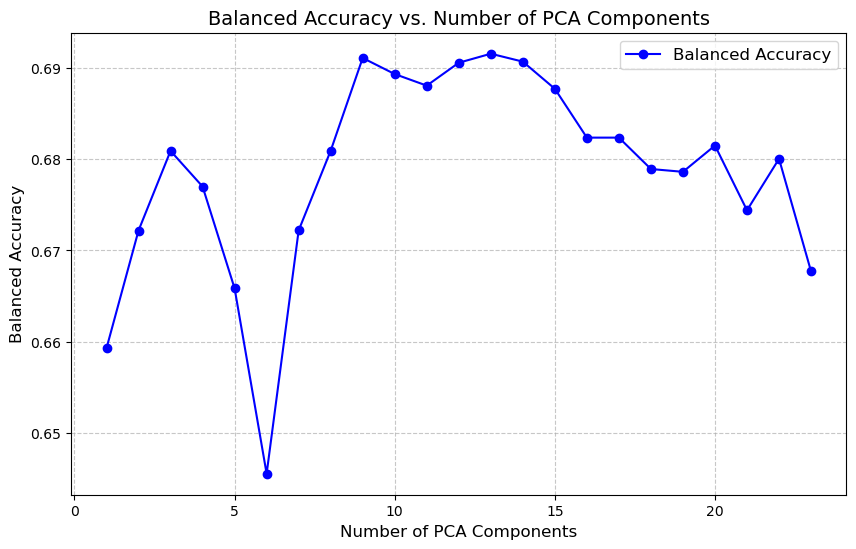

In [149]:
ba = []
for i in range(1, 24):
   model = grid_pipeline.fit(X_train_PCA[:, :i], y_train)
   ba.append(balanced_accuracy(y_test, model.predict(X_test_PCA[:, :i])))

plt.figure(figsize=(10, 6))
plt.plot(range(1, 24), ba, marker='o', linestyle='-', color='b', label='Balanced Accuracy')
plt.title('Balanced Accuracy vs. Number of PCA Components', fontsize=14)
plt.xlabel('Number of PCA Components', fontsize=12)
plt.ylabel('Balanced Accuracy', fontsize=12)
plt.grid(True, linestyle='--', alpha=0.7)
plt.legend(fontsize=12)
plt.show()

#### 2. Regresja Logistyczna

In [457]:
pipeline = Pipeline([
    ('pre', preprocessor),
    ('lg', LogisticRegression(penalty = None, max_iter = 1000, random_state = 372461))
])
model = pipeline.fit(X_train, y_train)
balanced_accuracy(y_test, model.predict(X_test))

0.7167741677949018

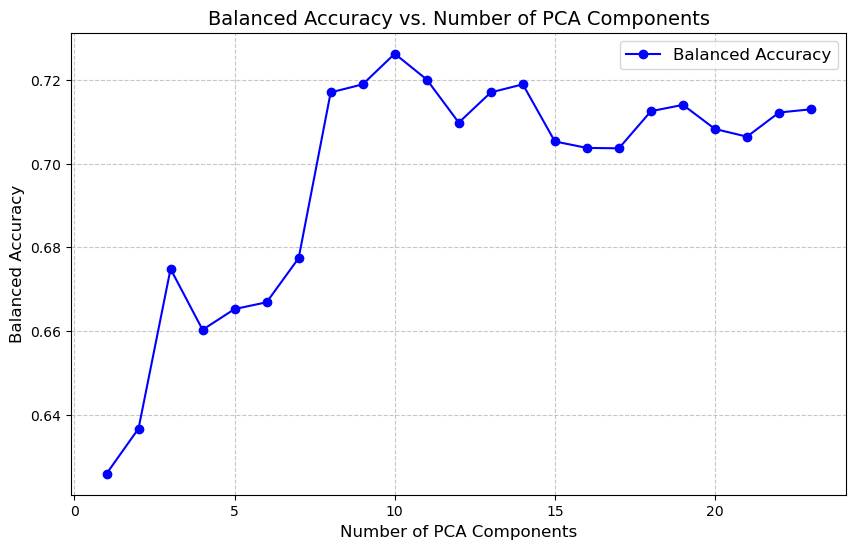

In [323]:
param_grid = {
    'C': [0.2, 0.4, 0.6, 0.8, 1]
}

grid_pipeline = GridSearchCV(
    estimator=LogisticRegression(penalty = 'None', max_iter = 1000, random_state = 372461),
    param_grid=param_grid,
    cv=3,
    scoring='balanced_accuracy'
)


ba = []
for i in range(1, 24):
   model = LogisticRegression(penalty = None, max_iter = 1000).fit(X_train_PCA[:, :i], y_train)
   ba.append(balanced_accuracy(y_test, model.predict(X_test_PCA[:, :i])))

plt.figure(figsize=(10, 6))
plt.plot(range(1, 24), ba, marker='o', linestyle='-', color='b', label='Balanced Accuracy')
plt.title('Balanced Accuracy vs. Number of PCA Components', fontsize=14)
plt.xlabel('Number of PCA Components', fontsize=12)
plt.ylabel('Balanced Accuracy', fontsize=12)
plt.grid(True, linestyle='--', alpha=0.7)
plt.legend(fontsize=12)
plt.savefig("lg1", dpi=300, bbox_inches="tight")
plt.show()

In [324]:
ba[9]

0.7261848132341151

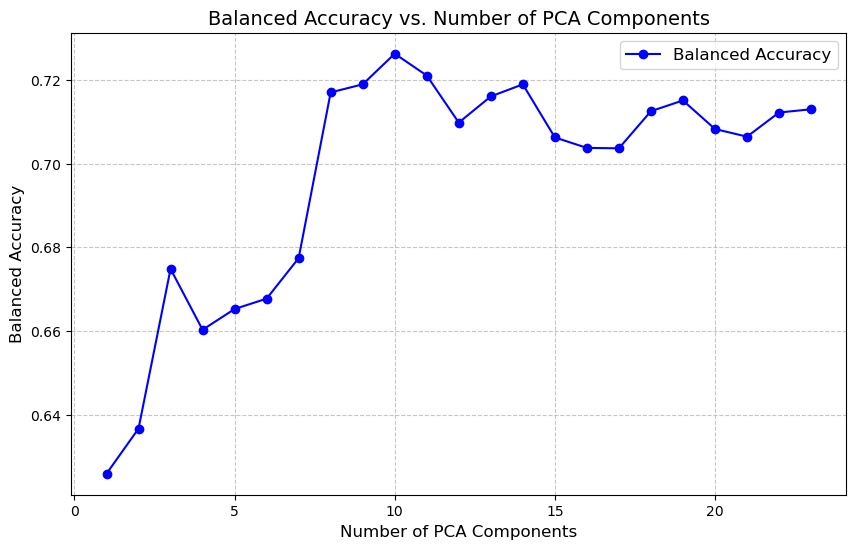

In [325]:
param_grid = {
    'C': [0.2, 0.4, 0.6, 0.8, 1]
}

grid_pipeline = GridSearchCV(
    estimator=LogisticRegression(penalty = 'l2', max_iter = 1000, random_state = 372461),
    param_grid=param_grid,
    cv=3,
    scoring='balanced_accuracy'
)

ba = []
for i in range(1, 24):
   model = grid_pipeline.fit(X_train_PCA[:, :i], y_train)
   ba.append(balanced_accuracy(y_test, model.predict(X_test_PCA[:, :i])))

plt.figure(figsize=(10, 6))
plt.plot(range(1, 24), ba, marker='o', linestyle='-', color='b', label='Balanced Accuracy')
plt.title('Balanced Accuracy vs. Number of PCA Components', fontsize=14)
plt.xlabel('Number of PCA Components', fontsize=12)
plt.ylabel('Balanced Accuracy', fontsize=12)
plt.grid(True, linestyle='--', alpha=0.7)
plt.legend(fontsize=12)
plt.savefig("lg2", dpi=300, bbox_inches="tight")
plt.show()

In [326]:
ba[9]

0.7261848132341151

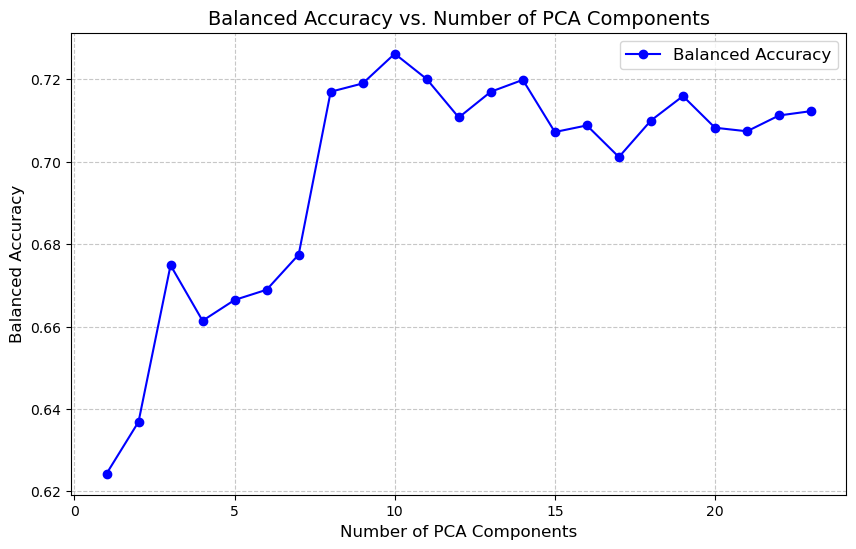

In [319]:
param_grid = {
    'C': [0.2, 0.4, 0.6, 0.8, 1]
}

grid_pipeline = GridSearchCV(
    estimator=LogisticRegression(penalty = 'l1', solver = 'liblinear'),
    param_grid=param_grid,
    cv=3,
    scoring='balanced_accuracy'
)

ba = []
for i in range(1, 24):
   model = grid_pipeline.fit(X_train_PCA[:, :i], y_train)
   ba.append(balanced_accuracy(y_test, model.predict(X_test_PCA[:, :i])))

plt.figure(figsize=(10, 6))
plt.plot(range(1, 24), ba, marker='o', linestyle='-', color='b', label='Balanced Accuracy')
plt.title('Balanced Accuracy vs. Number of PCA Components', fontsize=14)
plt.xlabel('Number of PCA Components', fontsize=12)
plt.ylabel('Balanced Accuracy', fontsize=12)
plt.grid(True, linestyle='--', alpha=0.7)
plt.legend(fontsize=12)
plt.savefig("lg3", dpi=300, bbox_inches="tight")
plt.show()

In [320]:
ba[9]

0.7261848132341151

In [321]:
pipeline = Pipeline([
    ('pre', preprocessor),
    ('lg', LogisticRegression(penalty = 'l2', max_iter = 1000))
])

param_grid = {
    'lg__C': [0.2, 0.4, 0.6, 0.8, 1]
}

grid_pipeline = GridSearchCV(
    estimator=pipeline,
    param_grid=param_grid,
    cv=3,
    scoring='balanced_accuracy'
)
model = grid_pipeline.fit(X_train, y_train)
balanced_accuracy(y_test, model.predict(X_test))

0.7171467348819263

In [242]:
pipeline = Pipeline([
    ('pre', preprocessor),
    ('lg', LogisticRegression(penalty = 'l1', solver = 'liblinear', max_iter = 1000))
])

param_grid = {
    'lg__C': [0.2, 0.4, 0.6, 0.8, 1]
}

grid_pipeline = GridSearchCV(
    estimator=pipeline,
    param_grid=param_grid,
    cv=3,
    scoring='balanced_accuracy'
)
model = grid_pipeline.fit(X_train, y_train)
balanced_accuracy(y_test, model.predict(X_test))

0.7123482703905635

#### 4. K najbliższych sąsiadów

In [244]:
pipeline = Pipeline([
    ('pre', preprocessor),
    ('knn', KNeighborsClassifier(n_neighbors = 5))
])
model = pipeline.fit(X_train, y_train)
balanced_accuracy(y_test, model.predict(X_test))

0.6498634475096219

In [245]:
numerical_transformer = Pipeline([
    ('imputer', KNNImputer()),
    ('scaler', RobustScaler())
])

preprocessor = ColumnTransformer([
    ('numerical',   numerical_transformer, numerical_features),
    ('categorical', categorical_transformer,   categorical_features)
])

pipeline = Pipeline([
    ('pre', preprocessor),
    ('knn', KNeighborsClassifier(n_neighbors = 5))
])
model = pipeline.fit(X_train, y_train)
balanced_accuracy(y_test, model.predict(X_test))

0.6573547071522902

In [248]:
pipeline = Pipeline([
    ('pre', preprocessor),
    ('selector', SelectFromModel(LogisticRegression(max_iter = 1000))),
    ('knn', KNeighborsClassifier(n_neighbors = 5))
])
model = pipeline.fit(X_train, y_train)
balanced_accuracy(y_test, model.predict(X_test))

0.6729243522488748

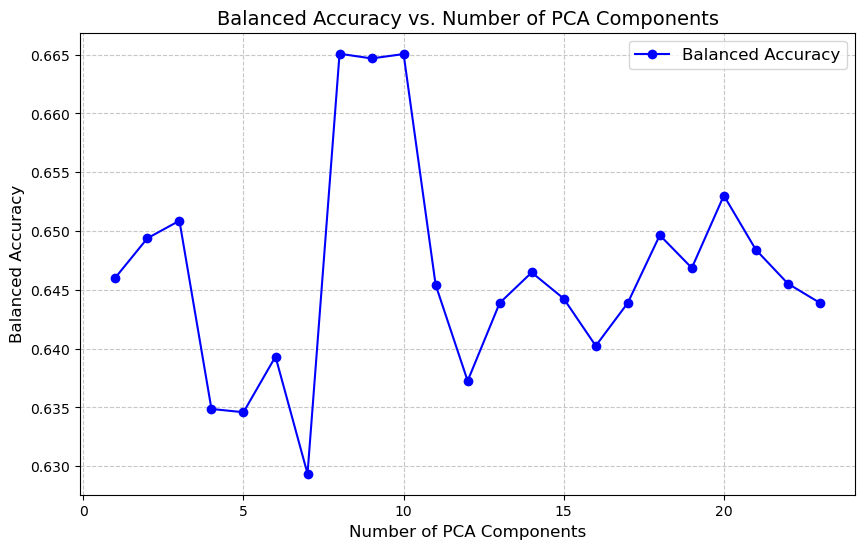

In [255]:
ba = []
for i in range(1, 24):
   model = KNeighborsClassifier(n_neighbors = 5).fit(X_train_PCA[:, :i], y_train)
   ba.append(balanced_accuracy(y_test, model.predict(X_test_PCA[:, :i])))

plt.figure(figsize=(10, 6))
plt.plot(range(1, 24), ba, marker='o', linestyle='-', color='b', label='Balanced Accuracy')
plt.title('Balanced Accuracy vs. Number of PCA Components', fontsize=14)
plt.xlabel('Number of PCA Components', fontsize=12)
plt.ylabel('Balanced Accuracy', fontsize=12)
plt.grid(True, linestyle='--', alpha=0.7)
plt.legend(fontsize=12)
plt.show()

#### 5. Bagging

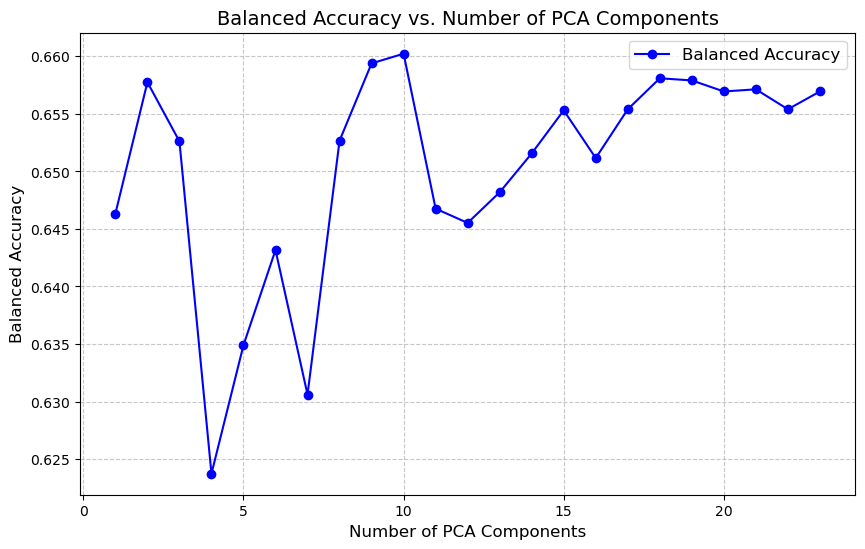

In [162]:
bagging = BaggingClassifier(estimator = KNeighborsClassifier(), random_state = 327461)

ba = []
for i in range(1, 24):
   model = bagging.fit(X_train_PCA[:, :i], y_train)
   ba.append(balanced_accuracy(y_test, model.predict(X_test_PCA[:, :i])))

plt.figure(figsize=(10, 6))
plt.plot(range(1, 24), ba, marker='o', linestyle='-', color='b', label='Balanced Accuracy')
plt.title('Balanced Accuracy vs. Number of PCA Components', fontsize=14)
plt.xlabel('Number of PCA Components', fontsize=12)
plt.ylabel('Balanced Accuracy', fontsize=12)
plt.grid(True, linestyle='--', alpha=0.7)
plt.legend(fontsize=12)
plt.show()

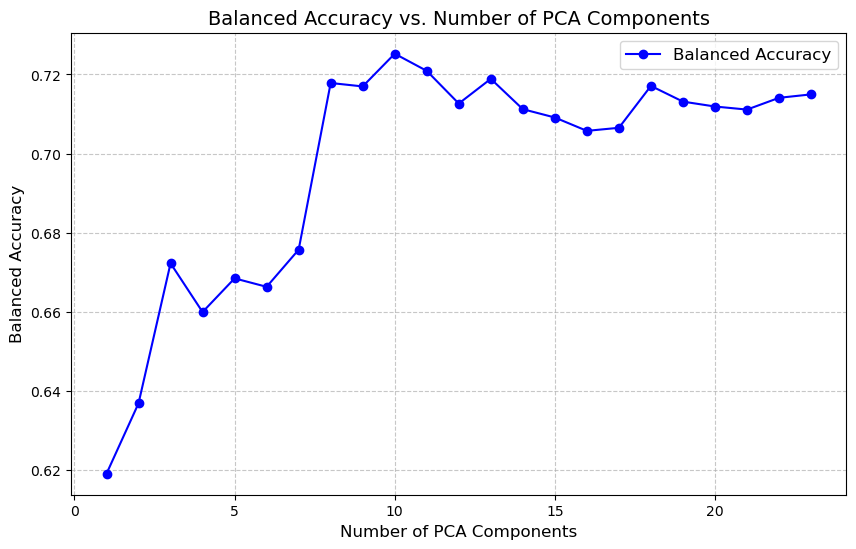

In [327]:
bagging = BaggingClassifier(estimator = LogisticRegression(penalty = None), random_state = 327461)

ba = []
for i in range(1, 24):
   model = bagging.fit(X_train_PCA[:, :i], y_train)
   ba.append(balanced_accuracy(y_test, model.predict(X_test_PCA[:, :i])))

plt.figure(figsize=(10, 6))
plt.plot(range(1, 24), ba, marker='o', linestyle='-', color='b', label='Balanced Accuracy')
plt.title('Balanced Accuracy vs. Number of PCA Components', fontsize=14)
plt.xlabel('Number of PCA Components', fontsize=12)
plt.ylabel('Balanced Accuracy', fontsize=12)
plt.grid(True, linestyle='--', alpha=0.7)
plt.legend(fontsize=12)
plt.savefig("bglg1", dpi=300, bbox_inches="tight")
plt.show()

In [328]:
ba[9]

0.7252251203358426

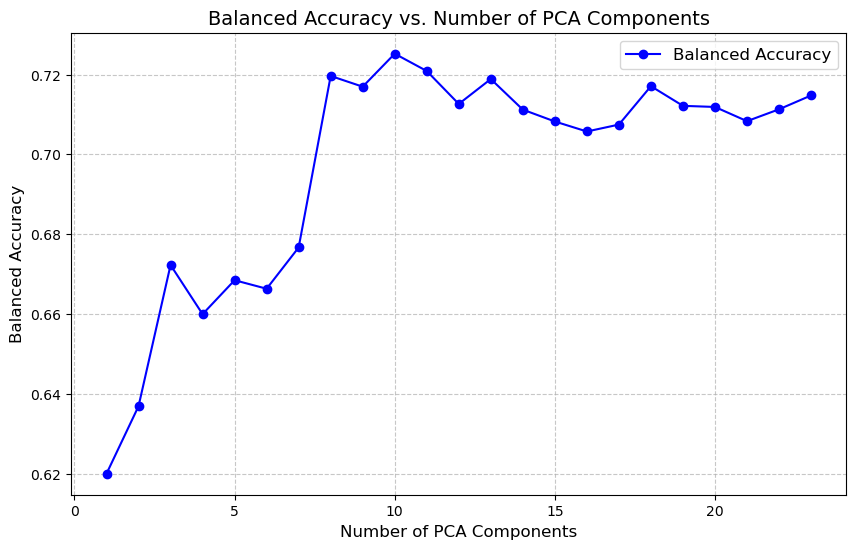

In [329]:
param_grid = {
    'estimator__C': [0.2, 0.4, 0.6, 0.8, 1]
}

grid_pipeline = GridSearchCV(
    estimator=BaggingClassifier(estimator = LogisticRegression(penalty = 'l2'), random_state = 327461),
    param_grid=param_grid,
    cv=3,
    scoring='balanced_accuracy'
)

ba = []
for i in range(1, 24):
   model = grid_pipeline.fit(X_train_PCA[:, :i], y_train)
   ba.append(balanced_accuracy(y_test, model.predict(X_test_PCA[:, :i])))

plt.figure(figsize=(10, 6))
plt.plot(range(1, 24), ba, marker='o', linestyle='-', color='b', label='Balanced Accuracy')
plt.title('Balanced Accuracy vs. Number of PCA Components', fontsize=14)
plt.xlabel('Number of PCA Components', fontsize=12)
plt.ylabel('Balanced Accuracy', fontsize=12)
plt.grid(True, linestyle='--', alpha=0.7)
plt.legend(fontsize=12)
plt.savefig("bglg2", dpi=300, bbox_inches="tight")
plt.show()

In [330]:
ba[9]

0.7252251203358426

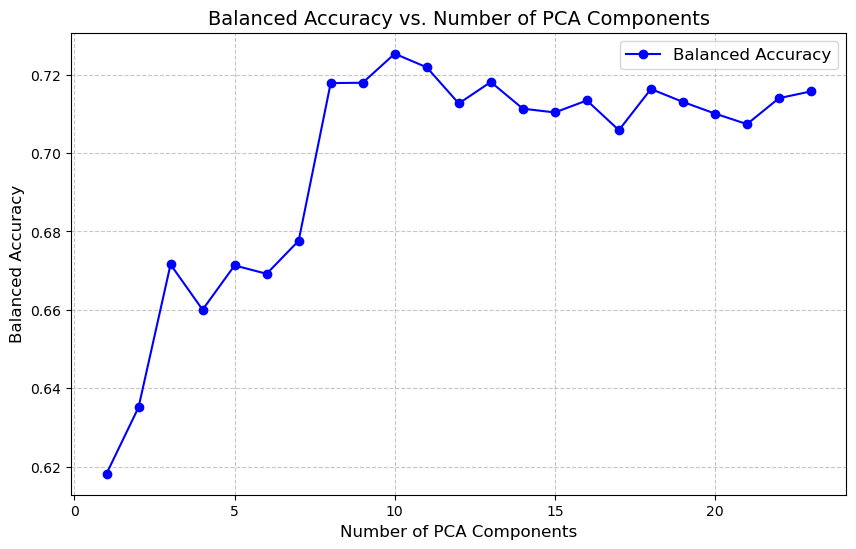

In [331]:
grid_pipeline = GridSearchCV(
    estimator=BaggingClassifier(estimator = LogisticRegression(penalty = 'l1', solver = 'liblinear'), random_state = 327461),
    param_grid=param_grid,
    cv=3,
    scoring='balanced_accuracy'
)

ba = []
for i in range(1, 24):
   model = grid_pipeline.fit(X_train_PCA[:, :i], y_train)
   ba.append(balanced_accuracy(y_test, model.predict(X_test_PCA[:, :i])))

plt.figure(figsize=(10, 6))
plt.plot(range(1, 24), ba, marker='o', linestyle='-', color='b', label='Balanced Accuracy')
plt.title('Balanced Accuracy vs. Number of PCA Components', fontsize=14)
plt.xlabel('Number of PCA Components', fontsize=12)
plt.ylabel('Balanced Accuracy', fontsize=12)
plt.grid(True, linestyle='--', alpha=0.7)
plt.legend(fontsize=12)
plt.savefig("bglg3", dpi=300, bbox_inches="tight")
plt.show()

In [332]:
ba[9]

0.7253182621075986

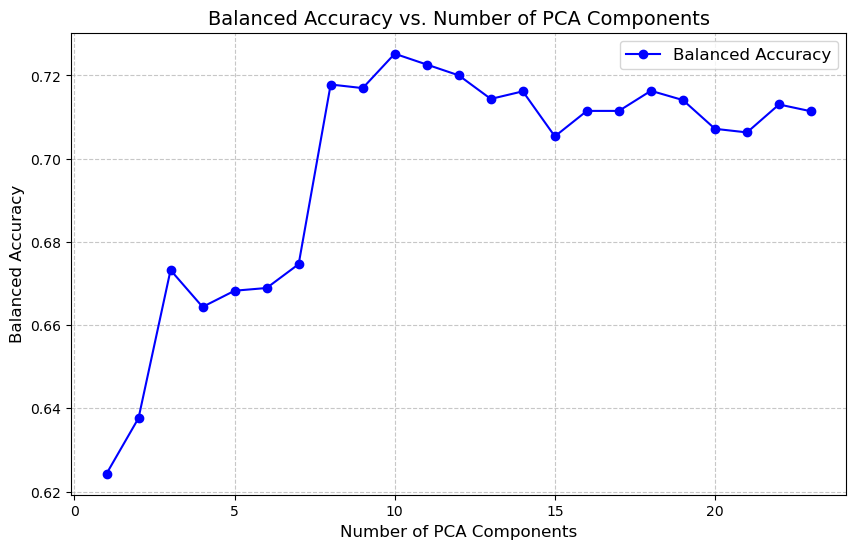

In [333]:
param_grid = {
    'estimator__C': [0.2, 0.4, 0.6, 0.8, 1],
    'n_estimators': [10, 20, 40, 60, 80, 100]
}

grid_pipeline = GridSearchCV(
    estimator=BaggingClassifier(estimator = LogisticRegression(penalty = 'l1', solver = 'liblinear'), random_state = 327461),
    param_grid=param_grid,
    cv=3,
    scoring='balanced_accuracy'
)

ba = []
for i in range(1, 24):
   model = grid_pipeline.fit(X_train_PCA[:, :i], y_train)
   ba.append(balanced_accuracy(y_test, model.predict(X_test_PCA[:, :i])))

plt.figure(figsize=(10, 6))
plt.plot(range(1, 24), ba, marker='o', linestyle='-', color='b', label='Balanced Accuracy')
plt.title('Balanced Accuracy vs. Number of PCA Components', fontsize=14)
plt.xlabel('Number of PCA Components', fontsize=12)
plt.ylabel('Balanced Accuracy', fontsize=12)
plt.grid(True, linestyle='--', alpha=0.7)
plt.legend(fontsize=12)
plt.show()

In [334]:
ba[9]

0.7252251203358426

#### 5. Las losowy, boosting

In [172]:
pipeline = Pipeline([
    ('pre', preprocessor),
    ('selector', SelectFromModel(LogisticRegression(max_iter = 200))),
    ('rf', RandomForestClassifier(random_state = 327461))
])

param_grid = {
    'rf__n_estimators': [50, 60, 70, 80, 90],
    'rf__max_depth': [5, 6, 7, 8, 9, 10],
    'rf__min_samples_leaf': [3, 4, 5, 6],
    'rf__criterion': ['gini', 'entropy']
}

grid_pipeline = GridSearchCV(
    estimator=pipeline,
    param_grid=param_grid,
    cv=3,
    scoring='balanced_accuracy'
)

model = grid_pipeline.fit(X_train, y_train)
balanced_accuracy(y_test, model.predict(X_test))

0.7136156637848159

In [265]:
pipeline = Pipeline([
    ('pre', preprocessor),
    ('selector', SelectFromModel(LogisticRegression(max_iter = 1000, penalty = None))),
    ('rf', RandomForestClassifier(random_state = 327461))
])

param_grid = {
    'rf__n_estimators': [50, 60, 70, 80, 90],
    'rf__max_depth': [5, 6, 7, 8, 9, 10],
    'rf__min_samples_leaf': [3, 4, 5, 6],
    'rf__criterion': ['gini', 'entropy']
}

grid_pipeline = GridSearchCV(
    estimator=pipeline,
    param_grid=param_grid,
    cv=3,
    scoring='balanced_accuracy'
)

model = grid_pipeline.fit(X_train, y_train)
balanced_accuracy(y_test, model.predict(X_test))

0.6910853344953878

In [266]:
pipeline = Pipeline([
    ('pre', preprocessor),
    ('selector', SelectFromModel(LogisticRegression(max_iter = 1000, penalty = 'l1', solver = 'liblinear'))),
    ('rf', RandomForestClassifier(random_state = 327461))
])

param_grid = {
    'rf__n_estimators': [50, 60, 70, 80, 90],
    'rf__max_depth': [5, 6, 7, 8, 9, 10],
    'rf__min_samples_leaf': [3, 4, 5, 6],
    'rf__criterion': ['gini', 'entropy']
}

grid_pipeline = GridSearchCV(
    estimator=pipeline,
    param_grid=param_grid,
    cv=3,
    scoring='balanced_accuracy'
)

model = grid_pipeline.fit(X_train, y_train)
balanced_accuracy(y_test, model.predict(X_test))

0.7128422544300554

In [173]:
grid_pipeline.best_params_

{'rf__criterion': 'entropy',
 'rf__max_depth': 8,
 'rf__min_samples_leaf': 3,
 'rf__n_estimators': 60}

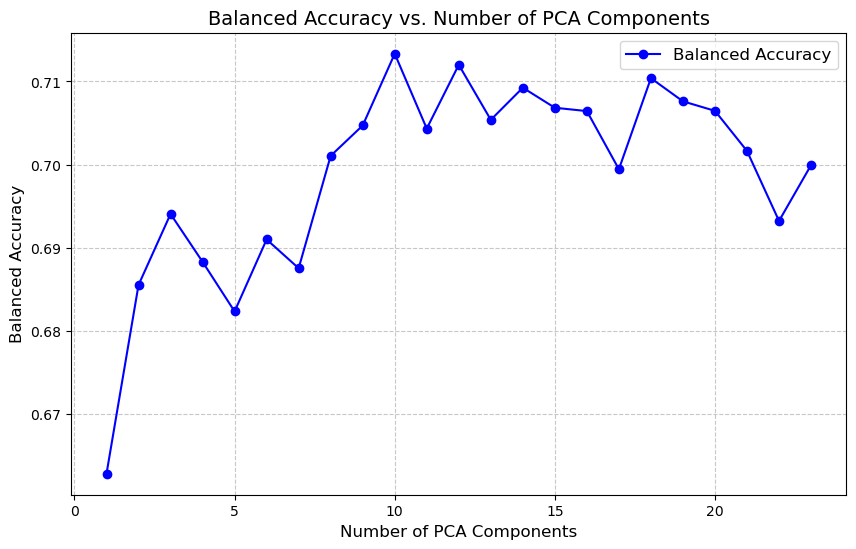

In [283]:
ba = []
for i in range(1, 24):
   model = RandomForestClassifier(criterion = 'entropy', max_depth = 8, min_samples_leaf = 3, 
                                  n_estimators = 60, random_state = 327461).fit(X_train_PCA[:, :i], y_train)
   ba.append(balanced_accuracy(y_test, model.predict(X_test_PCA[:, :i])))

plt.figure(figsize=(10, 6))
plt.plot(range(1, 24), ba, marker='o', linestyle='-', color='b', label='Balanced Accuracy')
plt.title('Balanced Accuracy vs. Number of PCA Components', fontsize=14)
plt.xlabel('Number of PCA Components', fontsize=12)
plt.ylabel('Balanced Accuracy', fontsize=12)
plt.grid(True, linestyle='--', alpha=0.7)
plt.legend(fontsize=12)
plt.savefig("rf1", dpi=300, bbox_inches="tight")
plt.show()

In [284]:
ba[9]

0.7133362384695476

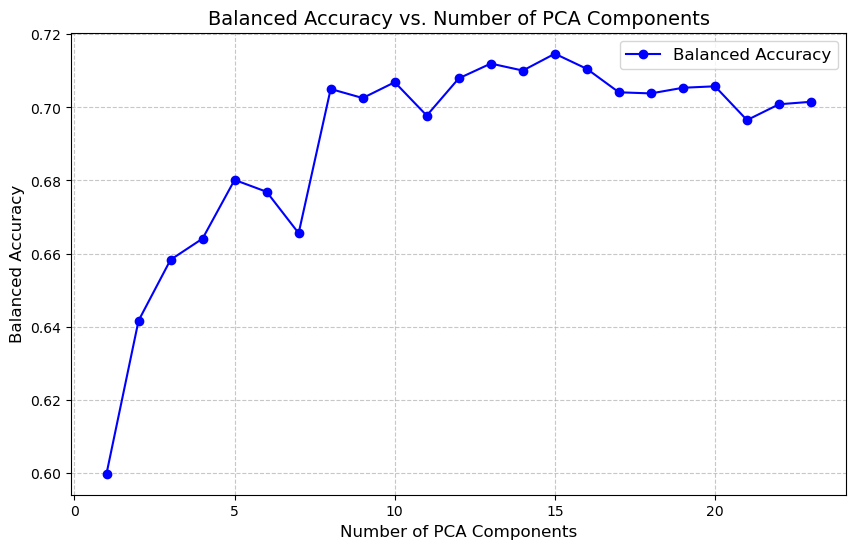

In [285]:
ba = []
for i in range(1, 24):
   model = RandomForestClassifier(random_state = 327461).fit(X_train_PCA[:, :i], y_train)
   ba.append(balanced_accuracy(y_test, model.predict(X_test_PCA[:, :i])))

plt.figure(figsize=(10, 6))
plt.plot(range(1, 24), ba, marker='o', linestyle='-', color='b', label='Balanced Accuracy')
plt.title('Balanced Accuracy vs. Number of PCA Components', fontsize=14)
plt.xlabel('Number of PCA Components', fontsize=12)
plt.ylabel('Balanced Accuracy', fontsize=12)
plt.grid(True, linestyle='--', alpha=0.7)
plt.legend(fontsize=12)
plt.savefig("rf2", dpi=300, bbox_inches="tight")
plt.show()

In [286]:
ba[14]

0.7146967736355563

In [176]:
pipeline = Pipeline([
    ('pre', preprocessor),
    ('selector', SelectFromModel(LogisticRegression(max_iter = 200))),
    ('extra', ExtraTreesClassifier(random_state = 327461))
])

param_grid = {
    'extra__n_estimators': [50, 60, 70, 80, 90],
    'extra__max_depth': [5, 6, 7, 8, 9, 10],
    'extra__min_samples_leaf': [3, 4, 5, 6],
    'extra__criterion': ['gini', 'entropy']
}

grid_pipeline = GridSearchCV(
    estimator=pipeline,
    param_grid=param_grid,
    cv=3,
    scoring='balanced_accuracy'
)

model = grid_pipeline.fit(X_train, y_train)
balanced_accuracy(y_test, model.predict(X_test))

0.7055655535116111

In [178]:
grid_pipeline.best_params_

{'extra__criterion': 'entropy',
 'extra__max_depth': 10,
 'extra__min_samples_leaf': 3,
 'extra__n_estimators': 50}

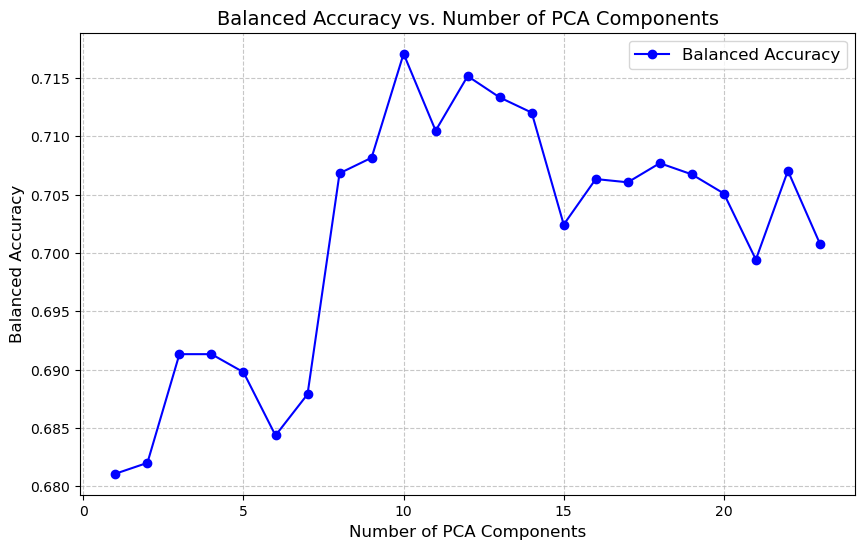

In [180]:
ba = []
for i in range(1, 24):
   model = ExtraTreesClassifier(random_state = 327461, n_estimators = 50, max_depth = 10, 
                                min_samples_leaf = 3, criterion = 'entropy').fit(X_train_PCA[:, :i], y_train)
   ba.append(balanced_accuracy(y_test, model.predict(X_test_PCA[:, :i])))

plt.figure(figsize=(10, 6))
plt.plot(range(1, 24), ba, marker='o', linestyle='-', color='b', label='Balanced Accuracy')
plt.title('Balanced Accuracy vs. Number of PCA Components', fontsize=14)
plt.xlabel('Number of PCA Components', fontsize=12)
plt.ylabel('Balanced Accuracy', fontsize=12)
plt.grid(True, linestyle='--', alpha=0.7)
plt.legend(fontsize=12)
plt.show()

In [182]:
pipeline = Pipeline([
    ('pre', preprocessor),
    ('selector', SelectFromModel(LogisticRegression(max_iter = 200))),
    ('gb', GradientBoostingClassifier(random_state = 327461))
])
model = pipeline.fit(X_train, y_train)
print(balanced_accuracy(y_test, model.predict(X_test)))

0.7109228686335104


In [184]:
pipeline = Pipeline([
    ('pre', preprocessor),
    ('selector', SelectFromModel(LogisticRegression(max_iter = 200))),
    ('gb', GradientBoostingClassifier(random_state = 327461))
])

param_grid = {
    'gb__learning_rate': [0.01, 0.05, 0.1, 0.2],
    'gb__n_estimators': [50, 100, 200, 300],
    'gb__max_depth': [3, 5, 7, 10],
    'gb__min_samples_split': [2, 5, 10],
    'gb__subsample': [0.6, 0.8, 1.0]
}

grid_pipeline = GridSearchCV(
    estimator=pipeline,
    param_grid=param_grid,
    cv=3,
    scoring='balanced_accuracy'
)

model = grid_pipeline.fit(X_train, y_train)
balanced_accuracy(y_test, model.predict(X_test))

0.7142027895960641

In [185]:
grid_pipeline.best_params_

{'gb__learning_rate': 0.01,
 'gb__max_depth': 3,
 'gb__min_samples_split': 2,
 'gb__n_estimators': 200,
 'gb__subsample': 0.6}

In [187]:
pipeline = Pipeline([
    ('pre', preprocessor),
    ('gb', GradientBoostingClassifier(random_state = 327461))
])
model = pipeline.fit(X_train, y_train)
print(balanced_accuracy(y_test, model.predict(X_test)))

0.7040187348020903


In [188]:
pipeline = Pipeline([
    ('pre', preprocessor),
    ('gb', GradientBoostingClassifier(random_state = 327461, learning_rate = 0.01, max_depth = 3, min_samples_split = 2,
                                     n_estimators = 200, subsample = 0.6))
])
model = pipeline.fit(X_train, y_train)
print(balanced_accuracy(y_test, model.predict(X_test)))

0.7083514904346726


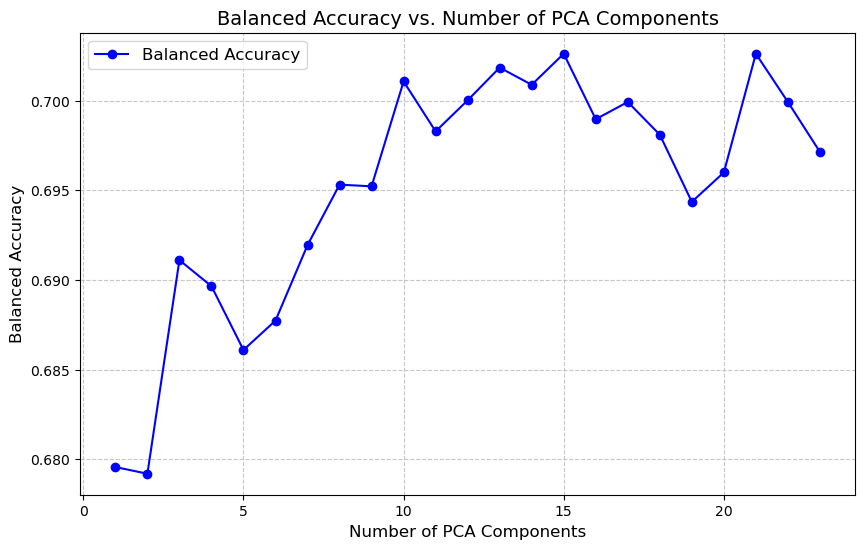

In [189]:
ba = []
for i in range(1, 24):
   model = GradientBoostingClassifier(random_state = 327461, learning_rate = 0.01, max_depth = 3, min_samples_split = 2,
                                     n_estimators = 200, subsample = 0.6).fit(X_train_PCA[:, :i], y_train)
   ba.append(balanced_accuracy(y_test, model.predict(X_test_PCA[:, :i])))
    
plt.figure(figsize=(10, 6))
plt.plot(range(1, 24), ba, marker='o', linestyle='-', color='b', label='Balanced Accuracy')
plt.title('Balanced Accuracy vs. Number of PCA Components', fontsize=14)
plt.xlabel('Number of PCA Components', fontsize=12)
plt.ylabel('Balanced Accuracy', fontsize=12)
plt.grid(True, linestyle='--', alpha=0.7)
plt.legend(fontsize=12)
plt.show()

#### 6. Voting

In [442]:
voting_models = VotingClassifier(estimators = [
    ('lr', LogisticRegression(max_iter = 1000, penalty = 'l2')),
    ('bg', BaggingClassifier(estimator = LogisticRegression(max_iter = 1000), random_state = 327461))
])

In [443]:
pipeline = Pipeline([
    ('pre', preprocessor),
    ('voting', voting_models)
])
model = pipeline.fit(X_train, y_train)
print(balanced_accuracy(y_test, model.predict(X_test)))

0.7155067744006494


In [444]:
voting_models = VotingClassifier(estimators = [
    ('lr', LogisticRegression(max_iter = 1000, penalty = 'l2')),
    ('bg', BaggingClassifier(estimator = LogisticRegression(max_iter = 1000), random_state = 327461))
])

pipeline = Pipeline([
    ('pre', preprocessor),
    ('selector', SelectFromModel(LogisticRegression(max_iter = 200))),
    ('voting', voting_models)
])
model = pipeline.fit(X_train, y_train)
print(balanced_accuracy(y_test, model.predict(X_test)))

0.7063106876856597


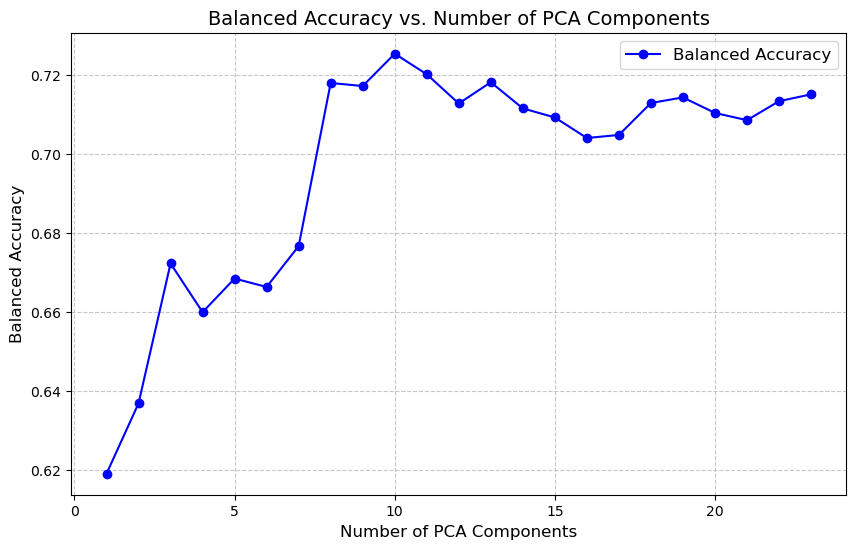

In [448]:
ba = []
for i in range(1, 24):
   model = voting_models.fit(X_train_PCA[:, :i], y_train)
   ba.append(balanced_accuracy(y_test, model.predict(X_test_PCA[:, :i])))
    
plt.figure(figsize=(10, 6))
plt.plot(range(1, 24), ba, marker='o', linestyle='-', color='b', label='Balanced Accuracy')
plt.title('Balanced Accuracy vs. Number of PCA Components', fontsize=14)
plt.xlabel('Number of PCA Components', fontsize=12)
plt.ylabel('Balanced Accuracy', fontsize=12)
plt.grid(True, linestyle='--', alpha=0.7)
plt.legend(fontsize=12)
plt.savefig("v1", dpi=300, bbox_inches="tight")
plt.show()

In [449]:
ba[9]

0.7253182621075986

In [450]:
voting_models = VotingClassifier(estimators = [
    ('lr', LogisticRegression(max_iter = 1000, penalty = 'l1', solver = 'liblinear')),
    ('rf', RandomForestClassifier(random_state = 327461)),
    ('bg', BaggingClassifier(estimator = LogisticRegression(max_iter = 1000), random_state = 327461))
])

In [451]:
pipeline = Pipeline([
    ('pre', preprocessor),
    ('voting', voting_models)
])
model = pipeline.fit(X_train, y_train)
print(balanced_accuracy(y_test, model.predict(X_test)))

0.7160007584401414


In [452]:
pipeline = Pipeline([
    ('pre', preprocessor),
    ('selector', SelectFromModel(LogisticRegression(max_iter = 200))),
    ('voting', voting_models)
])
model = pipeline.fit(X_train, y_train)
print(balanced_accuracy(y_test, model.predict(X_test)))

0.7081369317104489


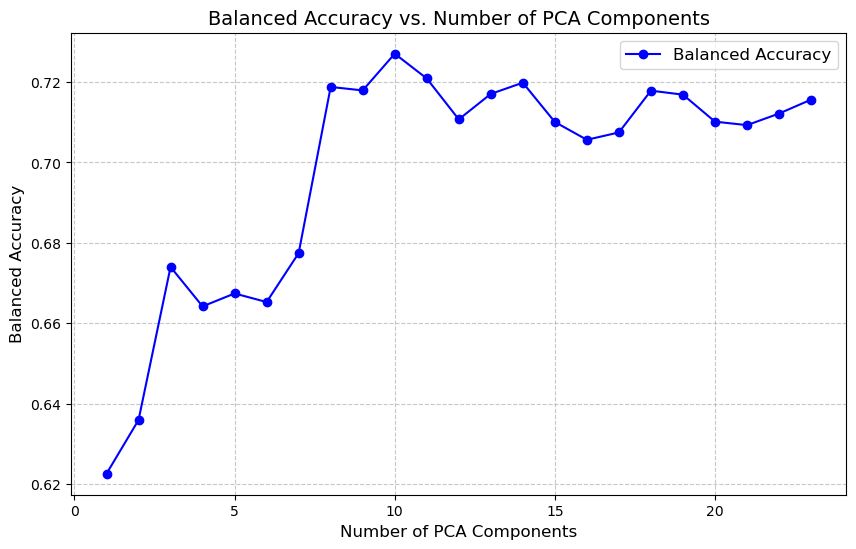

In [453]:
ba = []
for i in range(1, 24):
   model = voting_models.fit(X_train_PCA[:, :i], y_train)
   ba.append(balanced_accuracy(y_test, model.predict(X_test_PCA[:, :i])))
    
plt.figure(figsize=(10, 6))
plt.plot(range(1, 24), ba, marker='o', linestyle='-', color='b', label='Balanced Accuracy')
plt.title('Balanced Accuracy vs. Number of PCA Components', fontsize=14)
plt.xlabel('Number of PCA Components', fontsize=12)
plt.ylabel('Balanced Accuracy', fontsize=12)
plt.grid(True, linestyle='--', alpha=0.7)
plt.legend(fontsize=12)
plt.savefig("v2", dpi=300, bbox_inches="tight")
plt.show()

In [454]:
ba[9]

0.7270513643606317

### 5. Dopracowanie wybranego modelu

In [411]:
voting_models = VotingClassifier(estimators = [
    ('lr', LogisticRegression(max_iter = 1000, penalty = 'l1', solver = 'liblinear')),
    ('rf', RandomForestClassifier(random_state = 327461)),
    ('bg', BaggingClassifier(estimator = LogisticRegression(max_iter = 1000), random_state = 327461))
])

In [412]:
models = []
ba_score = []
max_i = 0
max_j = 1
for i in range(0, 8):
    X_train_PCA = preprocessors[i].fit_transform(X_train)
    X_test_PCA = preprocessors[i].transform(X_test)

    pca = PCA()
    X_train_PCA = pca.fit_transform(X_train_PCA)
    X_test_PCA = pca.transform(X_test_PCA)
    print('done')
    for j in range(1, 24):
        model = voting_models.fit(X_train_PCA[:, :j], y_train)
        models.append(model)
        ba_score.append(balanced_accuracy(y_test, model.predict(X_test_PCA[:, :j])))
        if max(ba_score) == balanced_accuracy(y_test, model.predict(X_test_PCA[:, :j])):
            max_i = i
            max_j = j

done
done
done
done
done
done
done
done


In [413]:
max(ba_score)

0.7308901359537219

In [414]:
X_train_PCA = preprocessors[max_i].fit_transform(X_train)
X_test_PCA = preprocessors[max_i].transform(X_test)

pca = PCA()
X_train_PCA = pca.fit_transform(X_train_PCA)
X_test_PCA = pca.transform(X_test_PCA)
model = voting_models.fit(X_train_PCA[:, :max_j], y_train)
balanced_accuracy(y_test, model.predict(X_test_PCA[:, :max_j]))

0.7308901359537219

In [415]:
max_i

3

In [416]:
max_j

5

### 6. Analiza jakości wybranego modelu

**miary jakości modelu na zbiorze treningowym**

In [427]:
y_pred = model.predict(X_train_PCA[:, :max_j])

accuracy = accuracy_score(y_train, y_pred)
recall = recall_score(y_train, y_pred)
precision = precision_score(y_train, y_pred)
ba = balanced_accuracy(y_train, y_pred)

print('dokładność:               ', round(accuracy, 3))
print('zabalansowana dokładność: ', round(ba, 3))
print('czułość:                  ', round(recall, 3))
print('precyzja:                 ', round(precision, 3))

dokładność:                0.733
zabalansowana dokładność:  0.73
czułość:                   0.782
precyzja:                  0.729


**miary jakości modelu na zbiorze testowym**

In [428]:
y_pred = model.predict(X_test_PCA[:, :max_j])

accuracy = accuracy_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
ba = balanced_accuracy(y_test, y_pred)

print('dokładność:               ', round(accuracy, 3))
print('zabalansowana dokładność: ', round(ba, 3))
print('czułość:                  ', round(recall, 3))
print('precyzja:                 ', round(precision, 3))

dokładność:                0.732
zabalansowana dokładność:  0.731
czułość:                   0.757
precyzja:                  0.729


**macierz pomyłek**

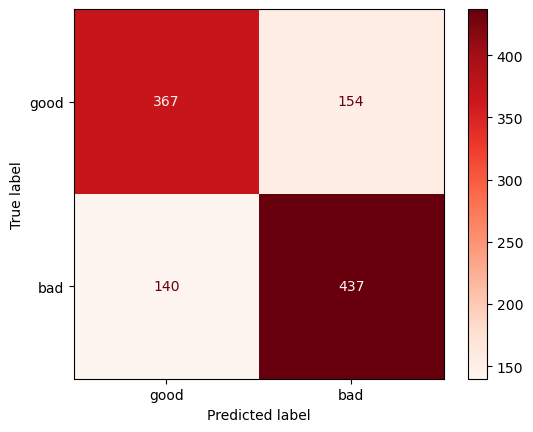

In [424]:
disp = ConfusionMatrixDisplay(confusion_matrix=confusion_matrix(y_test, model.predict(X_test_PCA[:, :max_j])),
                                 display_labels=['good', 'bad'])
disp.plot(cmap=plt.cm.Reds)
plt.savefig("cfmatrix.png", format="png", dpi=300)
plt.show()

### 7. Przygotowanie ostatecznej predykcji

In [477]:
X_train = pd.read_csv('X_train.csv')
y_train = pd.read_csv('y_train.csv')
X_test = pd.read_csv('X_test.csv')

In [478]:
X_train = X_train.drop(['Unnamed: 0'], axis = 1)
X_test = X_test.drop(['Unnamed: 0'], axis = 1)

In [479]:
X_train.replace([-9, -8, -7], np.nan, inplace=True)
X_test.replace([-9, -8, -7], np.nan, inplace=True)

In [480]:
X_train[['X10', 'X11']] = X_train[['X10', 'X11']].astype('category')
X_test[['X10', 'X11']] = X_test[['X10', 'X11']].astype('category')

In [481]:
y_train = y_train.drop(['Unnamed: 0'], axis = 1)

In [482]:
y_train = pd.get_dummies(y_train)

In [483]:
y_train = y_train['RiskPerformance_Bad']

In [484]:
voting_models = VotingClassifier(estimators = [
    ('lr', LogisticRegression(max_iter = 1000, penalty = 'l1', solver = 'liblinear')),
    ('rf', RandomForestClassifier(random_state = 327461)),
    ('bg', BaggingClassifier(estimator = LogisticRegression(max_iter = 1000), random_state = 327461))
])
X_train_PCA = preprocessors[max_i].fit_transform(X_train)
X_test_PCA = preprocessors[max_i].transform(X_test)

pca = PCA()
X_train_PCA = pca.fit_transform(X_train_PCA)
X_test_PCA = pca.transform(X_test_PCA)
model = voting_models.fit(X_train_PCA[:, :max_j], y_train)

In [485]:
y_test = model.predict(X_test_PCA[:, :max_j])

In [486]:
with open('example prediction.txt', 'w') as f:
    f.write('327461\n')
    np.savetxt(f, y_test, fmt='%d')